In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_percentage_error


### 5 pre-requisite rule
1) Every data should be numeric in nature, not in categorical type.
2) Data Type is correct or not - make sure you have DateTime column and Target variable (VWAP)
3) There should not be any missing data, if yes, first impute and then try to solve TSF
4) Data should be sequential order (DATETIME Columns) - TimeSeries always in an ascending order
5) We have to check whether in the given dataset - do we have Trend, Seasonality, Cyclicity and Irregular (Noise/Error)


In [265]:
import yfinance as yf

stk = yf.Ticker("TSLA")

In [266]:
stk_info = pd.DataFrame.from_dict(stk.info, orient='index',columns=['Info'])

In [267]:
avg_vol = stk_info[stk_info.index == 'averageVolume']

In [268]:
stk_hist = stk.history(period = '5y').asfreq('B')

In [269]:
stk_hist.fillna(method='bfill',inplace=True)  # Fill NaNs if there are gaps

In [270]:
stk_hist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-11-14 00:00:00-05:00,23.073999,23.589333,22.860666,23.290001,96973500.0,0.0,0.0
2019-11-15 00:00:00-05:00,23.375999,23.520000,23.224001,23.478001,72135000.0,0.0,0.0
2019-11-18 00:00:00-05:00,23.528000,23.543333,23.073334,23.332666,66006000.0,0.0,0.0
2019-11-19 00:00:00-05:00,23.450001,23.999332,23.186666,23.968000,115872000.0,0.0,0.0
2019-11-20 00:00:00-05:00,24.000000,24.080000,23.304667,23.481333,100876500.0,0.0,0.0
2019-11-21 00:00:00-05:00,23.634001,24.056000,23.600000,23.655333,91650000.0,0.0,0.0
2019-11-22 00:00:00-05:00,22.677334,22.733334,22.000000,22.202667,253059000.0,0.0,0.0
2019-11-25 00:00:00-05:00,22.954666,22.971333,22.297333,22.422667,185092500.0,0.0,0.0
2019-11-26 00:00:00-05:00,22.351334,22.366667,21.806667,21.927999,119211000.0,0.0,0.0


In [271]:
stk_hist.index = pd.to_datetime(stk_hist.index)

In [272]:
stk_hist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-11-14 00:00:00-05:00,23.073999,23.589333,22.860666,23.290001,96973500.0,0.0,0.0
2019-11-15 00:00:00-05:00,23.375999,23.520000,23.224001,23.478001,72135000.0,0.0,0.0
2019-11-18 00:00:00-05:00,23.528000,23.543333,23.073334,23.332666,66006000.0,0.0,0.0
2019-11-19 00:00:00-05:00,23.450001,23.999332,23.186666,23.968000,115872000.0,0.0,0.0
2019-11-20 00:00:00-05:00,24.000000,24.080000,23.304667,23.481333,100876500.0,0.0,0.0
2019-11-21 00:00:00-05:00,23.634001,24.056000,23.600000,23.655333,91650000.0,0.0,0.0
2019-11-22 00:00:00-05:00,22.677334,22.733334,22.000000,22.202667,253059000.0,0.0,0.0
2019-11-25 00:00:00-05:00,22.954666,22.971333,22.297333,22.422667,185092500.0,0.0,0.0
2019-11-26 00:00:00-05:00,22.351334,22.366667,21.806667,21.927999,119211000.0,0.0,0.0


In [273]:
stk_hist.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-31 00:00:00-04:00,257.989990,259.750000,249.250000,249.850006,66575300.0,0.0,0.0
2024-11-01 00:00:00-04:00,252.039993,254.000000,246.630005,248.979996,57544800.0,0.0,0.0
2024-11-04 00:00:00-05:00,244.559998,248.899994,238.880005,242.839996,68802400.0,0.0,0.0
2024-11-05 00:00:00-05:00,247.339996,255.279999,246.210007,251.440002,69282500.0,0.0,0.0
2024-11-06 00:00:00-05:00,284.670013,289.589996,275.619995,288.529999,165228700.0,0.0,0.0
2024-11-07 00:00:00-05:00,288.890015,299.750000,285.519989,296.910004,117309200.0,0.0,0.0
2024-11-08 00:00:00-05:00,299.140015,328.709991,297.660004,321.220001,204782800.0,0.0,0.0
2024-11-11 00:00:00-05:00,346.299988,358.640015,336.000000,350.000000,210521600.0,0.0,0.0
2024-11-12 00:00:00-05:00,342.739990,345.839996,323.309998,328.489990,155726000.0,0.0,0.0


In [274]:
stk_hist.duplicated().sum()

47

In [275]:
stk_hist.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

<Axes: xlabel='Date'>

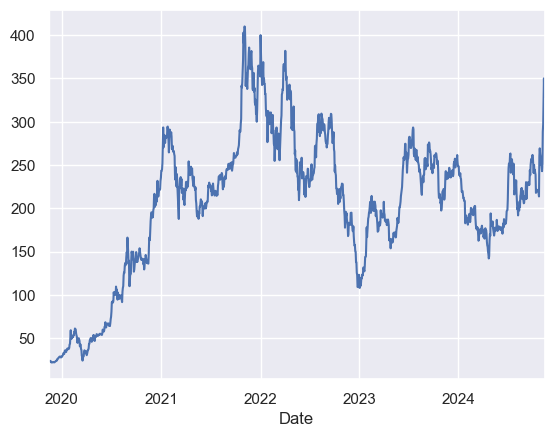

In [276]:
stk_hist['Close'].plot()

In [277]:
# Create a 5-day moving average
stk_hist['Monthly_value'] = (stk_hist['Close'].rolling(window=30).mean() - stk_hist['Close'].shift(1).rolling(window=30).mean())

# Create percentage change features
stk_hist['Pct_Change_close'] = stk_hist['Close'].pct_change()

stk_hist['Pct_Change_vol'] = stk_hist['Volume'].pct_change()

# lagged Close variable
stk_hist['Close_Lag1'] = stk_hist['Close'] -  stk_hist['Close'].shift(1)
#stk_hist['Close_Lag5'] = stk_hist['Close'] -  stk_hist['Close'].shift(5)


In [278]:
stk_hist = stk_hist.iloc[stk_hist.index.year > 2019  ]

In [279]:
stk_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Monthly_value,Pct_Change_close,Pct_Change_vol,Close_Lag1
Date,,,,,,,,,,,
2020-01-01 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,142981500.0,0.0,0.0,0.173422,0.028518,-0.073267,0.795334
2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,142981500.0,0.0,0.0,0.167622,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,266677500.0,0.0,0.0,0.244378,0.029633,0.865119,0.850000
2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,151995000.0,0.0,0.0,0.256000,0.019255,-0.430042,0.568666
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,268231500.0,0.0,0.0,0.311422,0.038801,0.764739,1.167999


In [280]:
stk_hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Monthly_value,Pct_Change_close,Pct_Change_vol,Close_Lag1
count,1271.000000,1271.000000,1271.000000,1271.000000,1.271000e+03,1271.0,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,208.797625,213.480006,203.841920,208.768972,1.265132e+08,0.0,0.006294,0.181125,0.002809,0.039548,0.237885
std,79.433819,81.050858,77.601183,79.306327,8.260308e+07,0.0,0.163499,1.537708,0.041646,0.314368,8.426704
min,24.980000,26.990667,23.367332,24.081333,2.940180e+07,0.0,0.000000,-4.678667,-0.210628,-0.738683,-46.480011
25%,173.044998,176.055000,168.864998,173.099998,7.602935e+07,0.0,0.000000,-0.813167,-0.018671,-0.152520,-3.368332
50%,219.463333,223.106674,214.066666,219.160004,1.029801e+08,0.0,0.000000,0.264889,0.001259,-0.011707,0.175999
75%,255.910004,260.605011,250.533333,256.544998,1.468511e+08,0.0,0.000000,1.089756,0.022006,0.160690,4.055000
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,0.0,5.000000,5.315778,0.219190,2.947500,47.666656


In [281]:
stk_hist.drop('Dividends',axis=1,inplace=True)

In [282]:
# To check Time Series is Stationary or not - this is mandatory steps
# please ensure your data should be stationary
# How will check it - Augmented dickey fuller test 

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Load your time series data
# Replace `your_time_series` with your actual data series (e.g., data['column_name'])


# Function to apply differencing and check stationarity with ADF test
def check_stationarity(series, max_d=2):
    results = {}
    for d in range(max_d + 1):
        # Apply differencing
        differenced_series = series if d == 0 else np.diff(series, n=d)
        
        # Perform ADF test
        adf_test = adfuller(differenced_series)
        
        # Collect results
        results[f'Differencing Order {d}'] = {
            'ADF Statistic': adf_test[0],
            'p-value': adf_test[1],
            'Critical Values': adf_test[4],
            'Stationary': adf_test[1] < 0.05
        }
        
        # Print or store results for analysis
        print(f"    Differencing Order {d}:")
        print(f"    ADF Statistic: {adf_test[0]}")
        print(f"    p-value: {adf_test[1]}")
        print(f"    Critical Values: {adf_test[4]}")
        print(f"    Is Stationary? {'Yes' if adf_test[1] < 0.05 else 'No'}")
        print("=" * 40)
    
    return results

# Run stationarity check with differencing orders 0 to 2

In [283]:
for i in stk_hist.columns :
    print(f'========== For {i} ====================================')
    check_stationarity(stk_hist[i], max_d=0)

========== For Open ====================================
    Differencing Order 0:
    ADF Statistic: -2.2300010578488396
    p-value: 0.19553751136138614
    Critical Values: {'1%': -3.4355135753070005, '5%': -2.8638202689908683, '10%': -2.567984037473585}
    Is Stationary? No
========== For High ====================================
    Differencing Order 0:
    ADF Statistic: -2.1985561811672705
    p-value: 0.20676989709363136
    Critical Values: {'1%': -3.4355176558157616, '5%': -2.8638220694163588, '10%': -2.5679849962931267}
    Is Stationary? No
========== For Low ====================================
    Differencing Order 0:
    ADF Statistic: -2.3713266928981813
    p-value: 0.14999329181535848
    Critical Values: {'1%': -3.4355135753070005, '5%': -2.8638202689908683, '10%': -2.567984037473585}
    Is Stationary? No
========== For Close ====================================
    Differencing Order 0:
    ADF Statistic: -2.404458971317447
    p-value: 0.1404818500766452
    Cr

In [285]:
df = stk_hist[['Close','Volume', 'Monthly_value','Pct_Change_vol',
       'Pct_Change_close', 'Close_Lag1']]

In [286]:
df.head()

,Close,Volume,Monthly_value,Pct_Change_vol,Pct_Change_close,Close_Lag1
Date,,,,,,
2020-01-01 00:00:00-05:00,28.684000,142981500.0,0.173422,-0.073267,0.028518,0.795334
2020-01-02 00:00:00-05:00,28.684000,142981500.0,0.167622,0.000000,0.000000,0.000000
2020-01-03 00:00:00-05:00,29.534000,266677500.0,0.244378,0.865119,0.029633,0.850000
2020-01-06 00:00:00-05:00,30.102667,151995000.0,0.256000,-0.430042,0.019255,0.568666
2020-01-07 00:00:00-05:00,31.270666,268231500.0,0.311422,0.764739,0.038801,1.167999


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1271 entries, 2020-01-01 00:00:00-05:00 to 2024-11-13 00:00:00-05:00
Freq: B
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Close             1271 non-null   float64
 1   Volume            1271 non-null   float64
 2   Monthly_value     1271 non-null   float64
 3   Pct_Change_vol    1271 non-null   float64
 4   Pct_Change_close  1271 non-null   float64
 5   Close_Lag1        1271 non-null   float64
dtypes: float64(6)
memory usage: 69.5 KB


<Axes: xlabel='Date'>

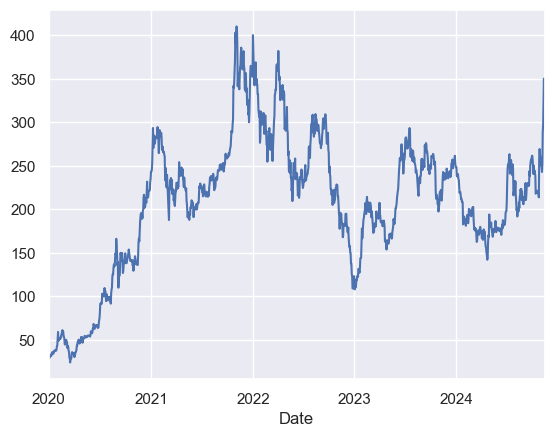

In [288]:
df['Close'].plot()

In [289]:
df.corr()

,Close,Volume,Monthly_value,Pct_Change_vol,Pct_Change_close,Close_Lag1
Close,1.000000,-0.602703,0.196544,-0.018235,-0.011671,0.042588
Volume,-0.602703,1.000000,0.120816,0.306462,0.144150,0.064807
Monthly_value,0.196544,0.120816,1.000000,0.014170,0.151717,0.171200
Pct_Change_vol,-0.018235,0.306462,0.014170,1.000000,0.165496,0.109491
Pct_Change_close,-0.011671,0.144150,0.151717,0.165496,1.000000,0.882452
Close_Lag1,0.042588,0.064807,0.171200,0.109491,0.882452,1.000000


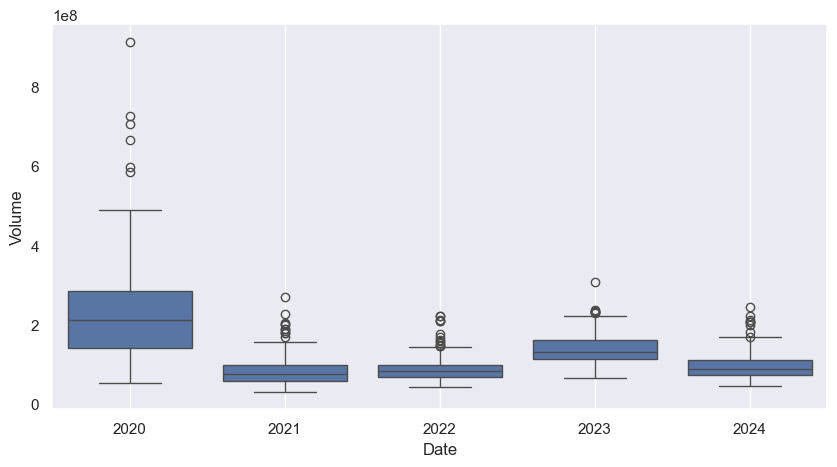

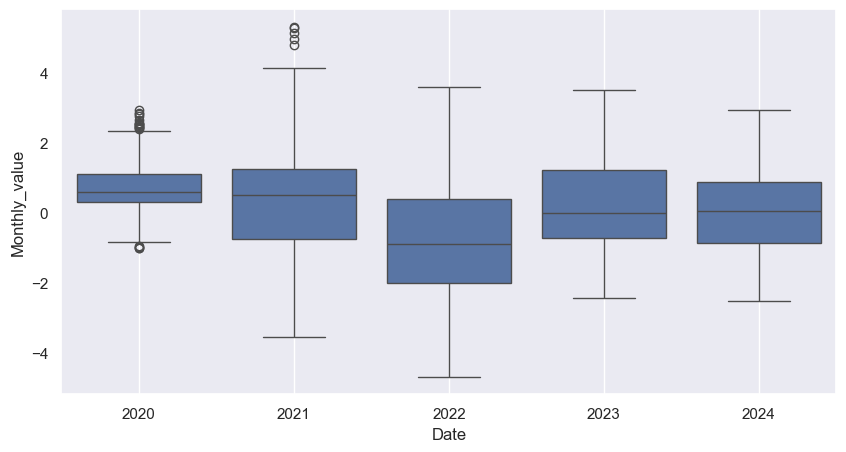

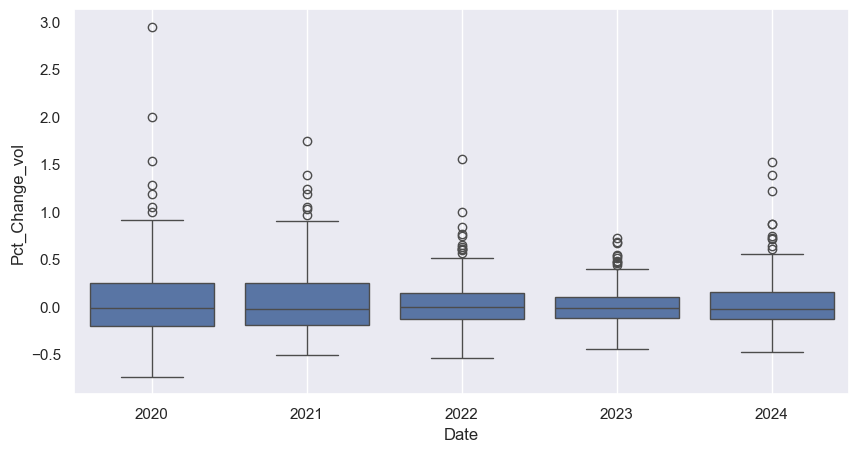

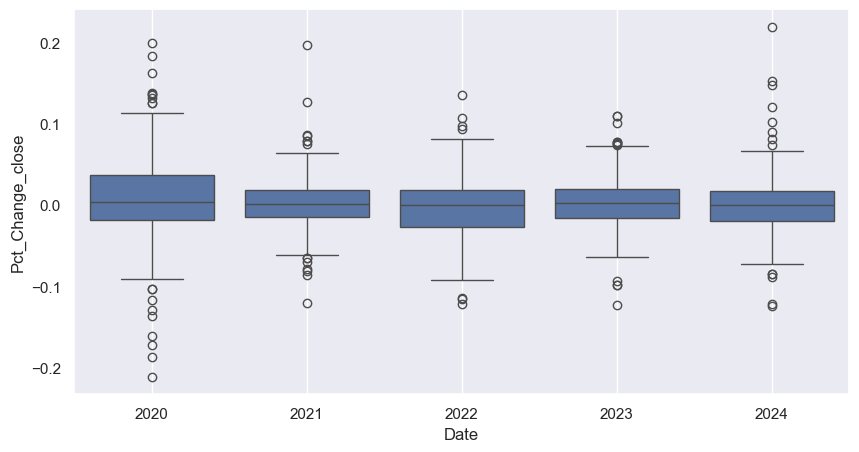

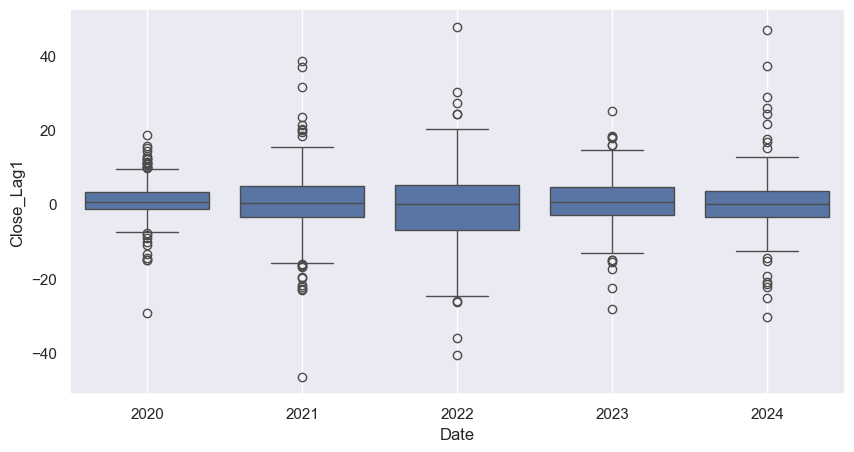

In [290]:
for i in df.columns[1:] :
    plt.figure(figsize=(10,5))
    sns.boxplot(x= pd.to_datetime(df.index).year, y=df[i] )
    plt.grid()
    plt.show()

<Figure size 2000x1000 with 0 Axes>

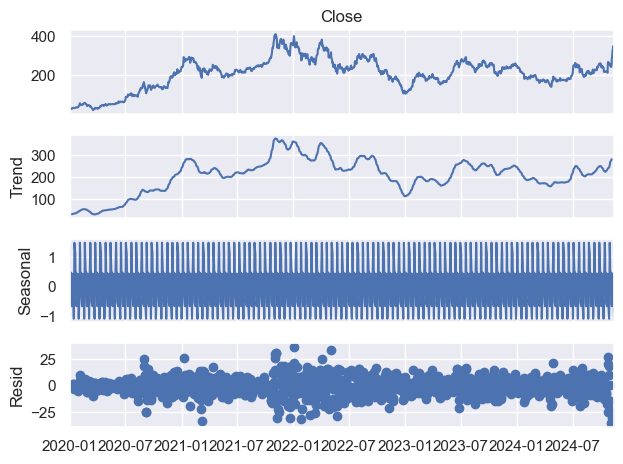

In [291]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(20,10))
decompse = seasonal_decompose(df['Close'], model='additive', period=12)
decompse.plot()
plt.show()

In [292]:
trend = decompse.trend
seasonality = decompse.seasonal
residual = decompse.resid

trend.head(12)

Date
2020-01-01 00:00:00-05:00          NaN
2020-01-02 00:00:00-05:00          NaN
2020-01-03 00:00:00-05:00          NaN
2020-01-06 00:00:00-05:00          NaN
2020-01-07 00:00:00-05:00          NaN
2020-01-08 00:00:00-05:00          NaN
2020-01-09 00:00:00-05:00    32.281389
2020-01-10 00:00:00-05:00    32.829111
2020-01-13 00:00:00-05:00    33.443361
2020-01-14 00:00:00-05:00    34.060611
2020-01-15 00:00:00-05:00    34.674944
2020-01-16 00:00:00-05:00    35.163333
Freq: B, Name: trend, dtype: float64

In [293]:
seasonality.head(12)

Date
2020-01-01 00:00:00-05:00    1.489598
2020-01-02 00:00:00-05:00    1.107800
2020-01-03 00:00:00-05:00    0.097610
2020-01-06 00:00:00-05:00    0.481136
2020-01-07 00:00:00-05:00   -0.532449
2020-01-08 00:00:00-05:00   -0.651664
2020-01-09 00:00:00-05:00   -0.179874
2020-01-10 00:00:00-05:00    0.441696
2020-01-13 00:00:00-05:00   -0.594027
2020-01-14 00:00:00-05:00   -0.420449
2020-01-15 00:00:00-05:00   -1.073513
2020-01-16 00:00:00-05:00   -0.165864
Freq: B, Name: seasonal, dtype: float64

In [294]:
residual.head(12)


Date
2020-01-01 00:00:00-05:00         NaN
2020-01-02 00:00:00-05:00         NaN
2020-01-03 00:00:00-05:00         NaN
2020-01-06 00:00:00-05:00         NaN
2020-01-07 00:00:00-05:00         NaN
2020-01-08 00:00:00-05:00         NaN
2020-01-09 00:00:00-05:00   -0.012182
2020-01-10 00:00:00-05:00   -1.394140
2020-01-13 00:00:00-05:00    2.141332
2020-01-14 00:00:00-05:00    2.221170
2020-01-15 00:00:00-05:00    0.965235
2020-01-16 00:00:00-05:00   -0.764803
Freq: B, Name: resid, dtype: float64

In [295]:
df.index = pd.to_datetime(df.index).date


In [296]:
df.corr()

,Close,Volume,Monthly_value,Pct_Change_vol,Pct_Change_close,Close_Lag1
Close,1.000000,-0.602703,0.196544,-0.018235,-0.011671,0.042588
Volume,-0.602703,1.000000,0.120816,0.306462,0.144150,0.064807
Monthly_value,0.196544,0.120816,1.000000,0.014170,0.151717,0.171200
Pct_Change_vol,-0.018235,0.306462,0.014170,1.000000,0.165496,0.109491
Pct_Change_close,-0.011671,0.144150,0.151717,0.165496,1.000000,0.882452
Close_Lag1,0.042588,0.064807,0.171200,0.109491,0.882452,1.000000


In [297]:
_ = check_stationarity(df['Close'], max_d=2)

    Differencing Order 0:
    ADF Statistic: -2.404458971317447
    p-value: 0.1404818500766452
    Critical Values: {'1%': -3.435550533536195, '5%': -2.863836575823745, '10%': -2.567992721718317}
    Is Stationary? No
    Differencing Order 1:
    ADF Statistic: -10.318826810835082
    p-value: 3.0467635248440413e-18
    Critical Values: {'1%': -3.435550533536195, '5%': -2.863836575823745, '10%': -2.567992721718317}
    Is Stationary? Yes
    Differencing Order 2:
    ADF Statistic: -12.300555619319184
    p-value: 7.467150856464342e-23
    Critical Values: {'1%': -3.4356133204636095, '5%': -2.8638642784217305, '10%': -2.5680074748794373}
    Is Stationary? Yes


In [298]:
train_df = df[:-14]

# training data means : 2000-01-03 to 2015-03-22
# test data means : 2015-03-23 to 2021-04-30
test_df = df[-14 : ]

In [299]:
train_df.shape , test_df.shape

((1257, 6), (14, 6))

### Estimating Trend Variables

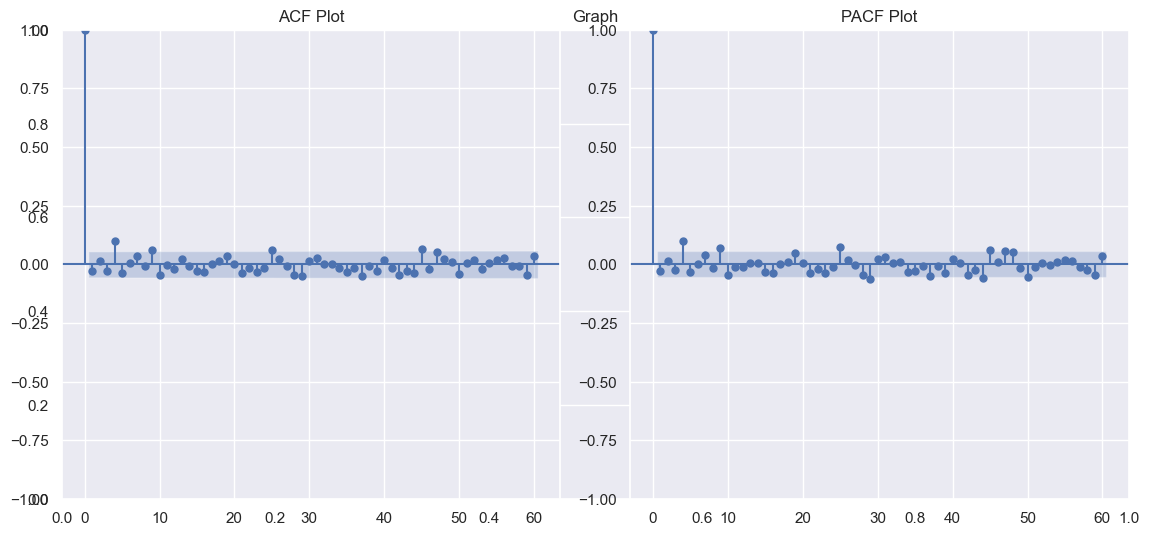

In [300]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Load your data
# Example assumes data is in a CSV file with 'Date' and 'Sales' columns
# Adjust the file path and column names as necessary
sales_data = train_df[['Close']].diff()[1:]

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.title('Graph')

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(sales_data, lags=60, ax=plt.gca(), alpha=0.05)
plt.title('ACF Plot')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(sales_data, lags=60, ax=plt.gca(), method='ywm', alpha=0.05)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

### Estimating Seasonality Variables

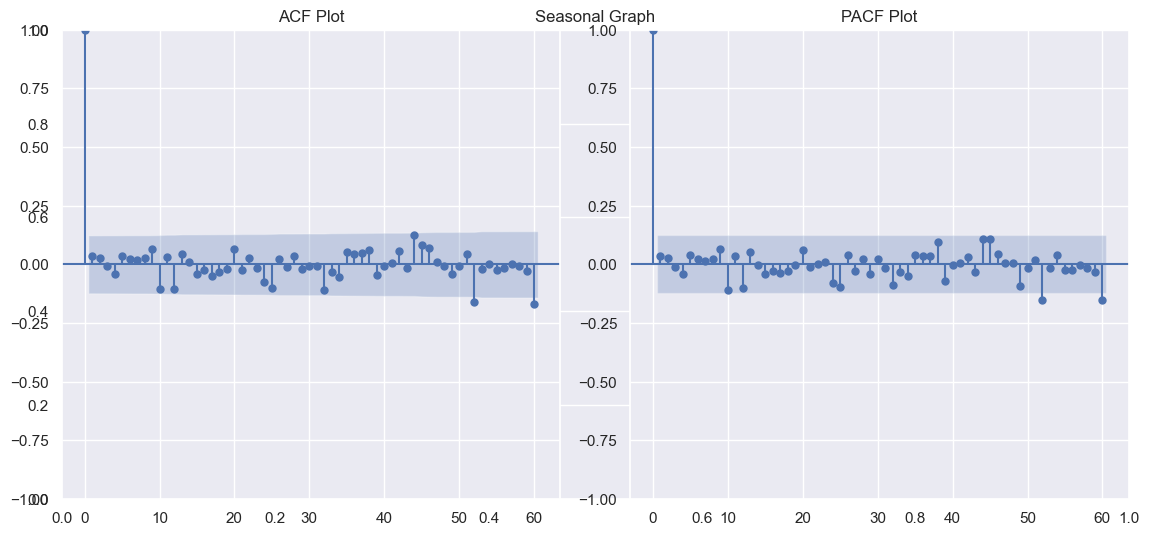

In [301]:
# Load your data
# Example assumes data is in a CSV file with 'Date' and 'Sales' columns
# Adjust the file path and column names as necessary
sales_data = train_df[['Close']].diff()[1:]



# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.title('Seasonal Graph')

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(sales_data[::5], lags=60, ax=plt.gca(), alpha=0.05)
plt.title('ACF Plot')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(sales_data[::5], lags=60, ax=plt.gca(), method='ywm', alpha=0.05)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [302]:
list(range(1,3))

[1, 2]

In [303]:
import itertools
def pdq_creator():

    # trend Variable

    p = range(0 , 3)
    q = range(0 ,  2)
    d = range(1,3)
    pdq = list(itertools.product(p, d, q)) # Trend

     # seasonlaity  Variable

    sp = range(0 , 3)
    sq = range(0 , 2)
    sd = range(1,3)
    

    seasonal_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(sp, sd, sq))] # Seasonality

    return pdq , seasonal_pdq


In [304]:
x_train = train_df.asfreq('B').drop('Close',axis=1)
x_test = test_df.asfreq('B').drop('Close',axis=1)

y_train = train_df['Close'].asfreq('B')
y_test = test_df['Close'].asfreq('B')

In [305]:
x_test.head()

,Volume,Monthly_value,Pct_Change_vol,Pct_Change_close,Close_Lag1
2024-10-25,161611900.0,1.296667,-0.209690,0.033438,8.709991
2024-10-28,107653600.0,1.191000,-0.333876,-0.024815,-6.679993
2024-10-29,80521800.0,1.055000,-0.252029,-0.011390,-2.990021
2024-10-30,53993600.0,1.011666,-0.329454,-0.007591,-1.970001
2024-10-31,66575300.0,0.197667,0.233022,-0.029897,-7.699982


In [306]:
from sklearn.preprocessing import StandardScaler

x_train = pd.DataFrame(StandardScaler().fit_transform(x_train),columns=x_train.columns,index=x_train.index)
x_test = pd.DataFrame(StandardScaler().fit_transform(x_test),columns=x_train.columns,index=x_test.index)

## ARIMA

In [307]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming pdq is a list of ARIMA (p, d, q) parameters
# Example: pdq = [(1, 1, 1), (2, 1, 2), ...]

dfobject_ARIMA = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])  # Initialize an empty dataframe to store results

pdq , _ = pdq_creator() # no seasonality

# Iterate through ARIMA parameters (p, d, q)
for param in pdq:
    try:
        # Build the ARIMA model
        model = ARIMA(y_train, order=param, freq='B')
        result_ARIMA = model.fit(method_kwargs={'maxiter': 10})

        # Print model summary (AIC)
        print(f"ARIMA{param} - AIC: {result_ARIMA.aic}")

        # Append results (AIC value) to dataframe
        dfobject_ARIMA = pd.concat([dfobject_ARIMA, pd.DataFrame([{
            "param": param,
            "AIC": result_ARIMA.aic
        }])], ignore_index=True)
        
    except Exception as e:
        print(f"ARIMA{param} failed: {e}")

ARIMA(0, 1, 0) - AIC: 8883.733467325526
ARIMA(0, 1, 1) - AIC: 8884.70955619635
ARIMA(0, 2, 0) - AIC: 9767.349882107765
ARIMA(0, 2, 1) - AIC: 8886.8125350706
ARIMA(1, 1, 0) - AIC: 8884.683363106782
ARIMA(1, 1, 1) - AIC: 8883.58359172316
ARIMA(1, 2, 0) - AIC: 9379.051794224131
ARIMA(1, 2, 1) - AIC: 8889.55780241618
ARIMA(2, 1, 0) - AIC: 8886.474737580313
ARIMA(2, 1, 1) - AIC: 8888.473915430002
ARIMA(2, 2, 0) - AIC: 9251.429946107484
ARIMA(2, 2, 1) - AIC: 8918.430822535323


In [308]:
best_param_ARIMA = dfobject_ARIMA.sort_values(by=['AIC']).iloc[0]

best_param_ARIMA['param']

(1, 1, 1)

In [309]:
model = ARIMA(y_train, order= best_param_ARIMA['param'])
result_ARIMA = model.fit()

# Print model summary (AIC)
print(result_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1257
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4438.792
Date:                Thu, 14 Nov 2024   AIC                           8883.584
Time:                        18:48:23   BIC                           8898.991
Sample:                    01-01-2020   HQIC                          8889.374
                         - 10-24-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7424      0.194     -3.821      0.000      -1.123      -0.362
ma.L1          0.7033      0.207      3.392      0.001       0.297       1.110
sigma2        68.7330      1.537     44.706      0.0

In [310]:
pred_SARIMAX_A = result_ARIMA.get_forecast(14)
y_pred = pred_SARIMAX_A.predicted_mean

# Assuming y_true contains actual values and y_pred contains predicted values
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")  # Multiply by 100 to express as percentage

MAPE: 9.60%


## SARIMA

In [314]:
import statsmodels.api as sm
import pandas as pd

# Assuming pdq and model_pdq are defined with appropriate parameter ranges
# Example:
# pdq = [(p,d,q) for p in range(3) for d in range(2) for q in range(3)]
# model_pdq = [(p,d,q,s) for p in range(3) for d in range(2) for q in range(3) for s in [12]]

# Initialize DataFrame to store AIC values
dfobject_SARIMA = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

pdq , model_pdq = pdq_creator()

for param in pdq:
    for param_seasonal in model_pdq:
        try:
            # Build the SARIMA model
            model = sm.tsa.statespace.SARIMAX(y_train, 
                                              order=param,
                                              seasonal_order=param_seasonal,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
            
            # Fit the model
            result_SARIMA = model.fit(maxiter=10)

            # Print the AIC value for model evaluation
            print(f"SARIMA {param},{param_seasonal} - AIC: {result_SARIMA.aic}")

            # Store the parameters and AIC values in a DataFrame
            dfobject_SARIMA = pd.concat([dfobject_SARIMA, pd.DataFrame([{"param": param, 
                                                           "seasonal": param_seasonal, 
                                                           "AIC": result_SARIMA.aic}])], 
                                 ignore_index=True)
        
        except Exception as e:
            print(f"Error fitting SARIMA {param} , {param_seasonal}: {e}")


SARIMA (0, 1, 0),(0, 1, 0, 5) - AIC: 9743.652593127543
SARIMA (0, 1, 0),(0, 1, 1, 5) - AIC: 8836.274486246843
SARIMA (0, 1, 0),(0, 2, 0, 5) - AIC: 11061.703203307201
SARIMA (0, 1, 0),(0, 2, 1, 5) - AIC: 9723.448095390364
SARIMA (0, 1, 0),(1, 1, 0, 5) - AIC: 9371.969695983986
SARIMA (0, 1, 0),(1, 1, 1, 5) - AIC: 8847.73052888655
SARIMA (0, 1, 0),(1, 2, 0, 5) - AIC: 10322.677093672479
SARIMA (0, 1, 0),(1, 2, 1, 5) - AIC: 9421.656883359827
SARIMA (0, 1, 0),(2, 1, 0, 5) - AIC: 9188.646141458577
SARIMA (0, 1, 0),(2, 1, 1, 5) - AIC: 8834.23235142199
SARIMA (0, 1, 0),(2, 2, 0, 5) - AIC: 9941.655116739217
SARIMA (0, 1, 0),(2, 2, 1, 5) - AIC: 9224.86524113902
SARIMA (0, 1, 1),(0, 1, 0, 5) - AIC: 9731.208011037974
SARIMA (0, 1, 1),(0, 1, 1, 5) - AIC: 8858.251446040755
SARIMA (0, 1, 1),(0, 2, 0, 5) - AIC: 11047.13575276193
SARIMA (0, 1, 1),(0, 2, 1, 5) - AIC: 10150.553652773364
SARIMA (0, 1, 1),(1, 1, 0, 5) - AIC: 9368.372676268427
SARIMA (0, 1, 1),(1, 1, 1, 5) - AIC: 9005.324198459452
SARIMA (0,

In [315]:
best_param_SARIMA = dfobject_SARIMA.sort_values(by=['AIC']).iloc[0]
best_param_SARIMA

param          (0, 1, 0)
seasonal    (2, 1, 1, 5)
AIC          8834.232351
Name: 9, dtype: object

In [316]:
model = sm.tsa.statespace.SARIMAX(y_train, 
                                    order=best_param_SARIMA['param'],
                                    seasonal_order=best_param_SARIMA['seasonal'],
                                    enforce_stationarity=True,
                                    enforce_invertibility=True)
result_SARIMA = model.fit()

# Print model summary (AIC)
print(result_SARIMA.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                 1257
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 5)   Log Likelihood               -4433.532
Date:                             Thu, 14 Nov 2024   AIC                           8875.064
Time:                                     18:53:23   BIC                           8895.591
Sample:                                 01-01-2020   HQIC                          8882.780
                                      - 10-24-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5       -0.0425      0.023     -1.825      0.068      -0.088       0.003
ar.S.L10      -0.0521      

In [317]:
pred_SARIMAX_A = result_SARIMA.get_forecast(14)
y_pred = pred_SARIMAX_A.predicted_mean

# Assuming y_true contains actual values and y_pred contains predicted values
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")  # Multiply by 100 to express as percentage

MAPE: 9.69%


## ARIMAX

In [318]:
x_train.head()

,Volume,Monthly_value,Pct_Change_vol,Pct_Change_close,Close_Lag1
2020-01-01,0.197582,0.002617,-0.361401,0.624668,0.073538
2020-01-02,0.197582,-0.001154,-0.126639,-0.063585,-0.022296
2020-01-03,1.690784,0.048744,2.645390,0.651579,0.080125
2020-01-06,0.306389,0.056299,-1.504586,0.401103,0.046226
2020-01-07,1.709543,0.092328,2.323751,0.872820,0.118443


In [319]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming pdq is a list of ARIMA (p, d, q) parameters
# Example: pdq = [(1, 1, 1), (2, 1, 2), ...]

dfobject_ARIMAX = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])  # Initialize an empty dataframe to store results

pdq , _ = pdq_creator()

# Iterate through ARIMA parameters (p, d, q)
for param in pdq:
    try:
        # Build the ARIMA model
        model = ARIMA(y_train, exog=x_train, order=param)
        result_ARIMA = model.fit()

        # Print model summary (AIC)
        print(f"ARIMAX {param} - AIC: {result_ARIMA.aic}")

        # Append results (AIC value) to dataframe
        dfobject_ARIMAX = pd.concat([dfobject_ARIMAX, pd.DataFrame([{
            "param": param,
            "AIC": result_ARIMA.aic
        }])], ignore_index=True)
        
        
    except Exception as e:
        print(f"ARIMAX {param} failed: {e}")


best_param_ARIMAX = dfobject_ARIMAX.sort_values(by=['AIC']).iloc[0]

ARIMAX (0, 1, 0) - AIC: 7425.353446970559
ARIMAX (0, 1, 1) - AIC: 7119.049874279013
ARIMAX (0, 2, 0) - AIC: 7688.611123129726
ARIMAX (0, 2, 1) - AIC: 7424.833684562731
ARIMAX (1, 1, 0) - AIC: 7264.235104686494
ARIMAX (1, 1, 1) - AIC: 7120.54180506414
ARIMAX (1, 2, 0) - AIC: 7671.263061091413
ARIMAX (1, 2, 1) - AIC: 7266.860643034912
ARIMAX (2, 1, 0) - AIC: 7205.865333788493
ARIMAX (2, 1, 1) - AIC: 7148.547536694786
ARIMAX (2, 2, 0) - AIC: 7372.0897454475635
ARIMAX (2, 2, 1) - AIC: 7208.27990186344


In [320]:
best_param_ARIMAX['param']

(0, 1, 1)

In [321]:
model = ARIMA(y_train, exog=x_train, order=best_param_ARIMAX['param'])
result_ARIMAX = model.fit()

# Print model summary (AIC)
print(result_ARIMAX.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1257
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3552.525
Date:                Thu, 14 Nov 2024   AIC                           7119.050
Time:                        18:57:21   BIC                           7155.000
Sample:                    01-01-2020   HQIC                          7132.561
                         - 10-24-2024                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Volume              -0.0668      0.072     -0.931      0.352      -0.207       0.074
Monthly_value        0.7637      0.103      7.402      0.000       0.562       0.966
Pct_Change_vol       0.0202 

In [323]:
pred_SARIMAX_A = result_ARIMAX.get_prediction(
    start=x_test.index[0],    # start of the test set
    end=x_test.index[-1],     # end of the test set
    exog=x_test     # providing exogenous variable(s)
)
y_pred = pred_SARIMAX_A.predicted_mean

# Assuming y_true contains actual values and y_pred contains predicted values
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")  # Multiply by 100 to express as percentage

MAPE: 8.98%


## SARIMAX

In [324]:
# Lets build the model

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

dfobject_SARIMAX = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

pdq , model_pdq = pdq_creator()

for param in pdq:
    for param_seasonal in model_pdq:
        model = sm.tsa.statespace.SARIMAX(y_train, 
                                          exog=x_train,
                                          order = param,
                                          seasonal_order= param_seasonal,
                                          enforce_stationarity= False,
                                          enforce_invertibility=False)
        
        result_SARIMAX = model.fit()

        print("SARIMAX {},{} - AIC:{}".format(param, param_seasonal, result_SARIMAX.aic))

        dfobject_SARIMAX = pd.concat([dfobject_SARIMAX, 
                                    pd.DataFrame([{"param":param, 
                                                   "seasonal":param_seasonal,
                                                   "AIC" : result_SARIMAX.aic}])], 
                                                   ignore_index=True)

SARIMAX (0, 1, 0),(0, 1, 0, 5) - AIC:8256.138941968527
SARIMAX (0, 1, 0),(0, 1, 1, 5) - AIC:7382.533141094898
SARIMAX (0, 1, 0),(0, 2, 0, 5) - AIC:9586.720323344802
SARIMAX (0, 1, 0),(0, 2, 1, 5) - AIC:8225.637591436303
SARIMAX (0, 1, 0),(1, 1, 0, 5) - AIC:7889.645716110002
SARIMAX (0, 1, 0),(1, 1, 1, 5) - AIC:7384.529931704135
SARIMAX (0, 1, 0),(1, 2, 0, 5) - AIC:8826.213540802964
SARIMAX (0, 1, 0),(1, 2, 1, 5) - AIC:7886.422278982424
SARIMAX (0, 1, 0),(2, 1, 0, 5) - AIC:7741.918187978502
SARIMAX (0, 1, 0),(2, 1, 1, 5) - AIC:7366.917299706885
SARIMAX (0, 1, 0),(2, 2, 0, 5) - AIC:8485.046550546002
SARIMAX (0, 1, 0),(2, 2, 1, 5) - AIC:7745.321635377895
SARIMAX (0, 1, 1),(0, 1, 0, 5) - AIC:7980.0889758571
SARIMAX (0, 1, 1),(0, 1, 1, 5) - AIC:7078.26248602154
SARIMAX (0, 1, 1),(0, 2, 0, 5) - AIC:9289.047021399729
SARIMAX (0, 1, 1),(0, 2, 1, 5) - AIC:7950.862155956314
SARIMAX (0, 1, 1),(1, 1, 0, 5) - AIC:7643.497435437343
SARIMAX (0, 1, 1),(1, 1, 1, 5) - AIC:7087.68017362247
SARIMAX (0, 1,

In [325]:
dfobject_SARIMAX.sort_values(by=['AIC']).iloc[0]

param          (2, 1, 1)
seasonal    (2, 1, 1, 5)
AIC          7060.668505
Name: 117, dtype: object

## Final Model

In [326]:
best_model = {'param' : dfobject_SARIMA.sort_values(by=['AIC']).iloc[0]['param'] ,
'seasonal' : dfobject_SARIMA.sort_values(by=['AIC']).iloc[0]['seasonal']  }


model = sm.tsa.statespace.SARIMAX(y_train ,
                                order= best_model['param'], seasonal_order = best_model['seasonal'],
                        enforce_stationarity= False,enforce_invertibility=False)
result = model.fit()
print(result.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Close   No. Observations:                 1257
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 5)   Log Likelihood               -4402.668
Date:                             Thu, 14 Nov 2024   AIC                           8813.336
Time:                                     19:32:05   BIC                           8833.830
Sample:                                 01-01-2020   HQIC                          8821.043
                                      - 10-24-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5       -0.0443      0.024     -1.882      0.060      -0.091       0.002
ar.S.L10      -0.0046      

In [327]:
pred_SARIMAX_A = result.get_prediction(
    start=x_test.index[0],    # start of the test set
    end=x_test.index[-1],     # end of the test set
    exog=x_test     # providing exogenous variable(s)
)
y_pred = pred_SARIMAX_A.predicted_mean

# Assuming y_true contains actual values and y_pred contains predicted values
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")  # Multiply by 100 to express as percentage

MAPE: 9.48%


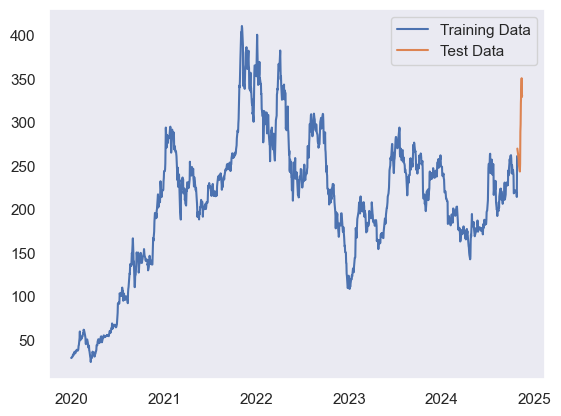

In [328]:
plt.plot(y_train, label="Training Data")
plt.plot(y_test, label="Test Data")
plt.legend(loc='best')
plt.grid();

In [ ]:
plt.plot(y_train, label="Training Data")
plt.plot(y_test, label="Test Data")
plt.plot(x_test.index, y_pred, label='Predicted Model - SARIMAX')
plt.legend(loc='best')
plt.grid();

In [ ]:
# To get confidence intervals
confidence_intervals = pred_SARIMAX.conf_int(alpha=0.05)
print(confidence_intervals)